<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Загрузка-и-предобработка-данных" data-toc-modified-id="Загрузка-и-предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка и предобработка данных</a></span></li><li><span><a href="#Топ-10-городов-по-количеству-рейсов" data-toc-modified-id="Топ-10-городов-по-количеству-рейсов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Топ-10 городов по количеству рейсов</a></span></li><li><span><a href="#Распределение-числа-полетов-по-моделям-самолетов" data-toc-modified-id="Распределение-числа-полетов-по-моделям-самолетов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Распределение числа полетов по моделям самолетов</a></span></li><li><span><a href="#Визуализация-числа-рейсов-по-городам" data-toc-modified-id="Визуализация-числа-рейсов-по-городам-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Визуализация числа рейсов по городам</a></span></li><li><span><a href="#Визуализация-топ-10-городов-по-среднему-количеству-рейсов-в-день" data-toc-modified-id="Визуализация-топ-10-городов-по-среднему-количеству-рейсов-в-день-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Визуализация топ-10 городов по среднему количеству рейсов в день</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Аналитика в авиакомпании

## Описание проекта

Аналитику предоставлены данные от российской авиакомпании, выполняющей внутренние пассажирские авиаперевозки. 

Задача аналитика заключается в исследовании спроса пассажиров на рейсы в города, где проходят крупнейшие фестивали. 

Предыдущий этап работы включал в себя построение SQL-запросов о количестве рейсов в определенные даты, на определенных моделях самолетов и прибывающие в указанные города, а также были подготовлены данные о количестве рейсов в города во время фестивалей.

Датасеты содержат результаты запросов с предыдущего этапа работы. 

/datasets/query_1.csv — результат первого запроса. Содержит информацию о model — модели самолета и flights_amount — количестве рейсов для каждой модели самолетов model в сентябре 2018 года.

/datasets/query_3.csv — результат третьего запроса. Содержит информацию о city — городах и average_flights — среднем количестве рейсов, прибывающих в город city за день в августе 2018 года.

## Загрузка и предобработка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
model_flights = pd.read_csv('/datasets/query_1.csv')
model_flights

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [2]:
city_flights = pd.read_csv('/datasets/query_3.csv')
city_flights 

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


In [3]:
model_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


в таблице о моделях самолетов и количестве рейсов типы данных соответствуют ожиданиям - строковый тип у названий моделей самолетов и целый тип для количества полетов

In [4]:
model_flights.isna().sum()

model             0
flights_amount    0
dtype: int64

проверила на наличие пропусков, их нет

In [5]:
city_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


во второй таблице с названиями городов и средним числом полетов с типами данных тоже все в порядке: города - строковый, среднее число полетов - вещественный, так как есть дробные числа

In [6]:
city_flights.isna().sum()

city               0
average_flights    0
dtype: int64

пропусков во второй таблице тоже нет

## Топ-10 городов по количеству рейсов

In [7]:
city_flights.sort_values(by = 'average_flights', ascending = False).head(10)

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


вывела список 10 городов с наибольшим числом полетов в среднем 

## Распределение числа полетов по моделям самолетов

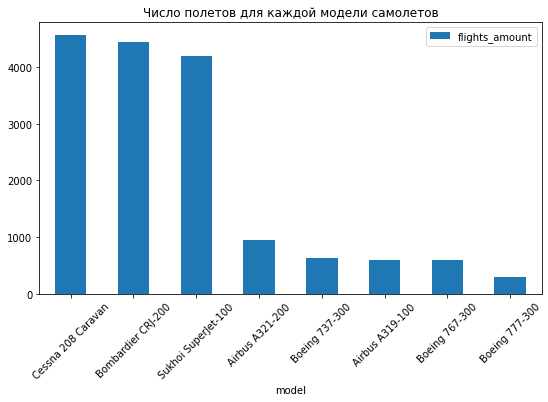

In [8]:
model_flights.sort_values(by = 'flights_amount', ascending = False).plot(kind = 'bar', figsize = (9, 5), x = 'model')
plt.xticks(rotation=45)
plt.title('Число полетов для каждой модели самолетов')
plt.show()

Среди моделей самолетов сильно выделяются три по числу купленных билетов: Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100 - свыше 4000 билетов, у остальных - меньше 1000

Cамолет Cessna 208 caravan является небольшим одномоторным легким самолетом, который предназначен для непродолжительных полетов, вмещает в себя до 11 пассажиров

Bombardier CRJ-200 - небольшой региональный самолет, вместимостью до 50 пассажиров

Sukhoi SuperJet-100 - российский самолет, перевозка до 108 пассажиров

Остальные самолеты в выборке - аэробусы и боинги, которые являются более вместимыми. 
Так как данные у нас о российской авиакомпании, выполняющей внутренние рейсы, получается, что гораздо чаще внутри страны летают самолеты небольшой вместимости, ведь 77% данных о полетах приходится на регионы (не Москву), значит, пассажиропоток небольшой и нет необходимости ставить на рейсы самолеты большой вместимости, плюс они дороже в эксплуатации и обслуживании. 

## Визуализация числа рейсов по городам

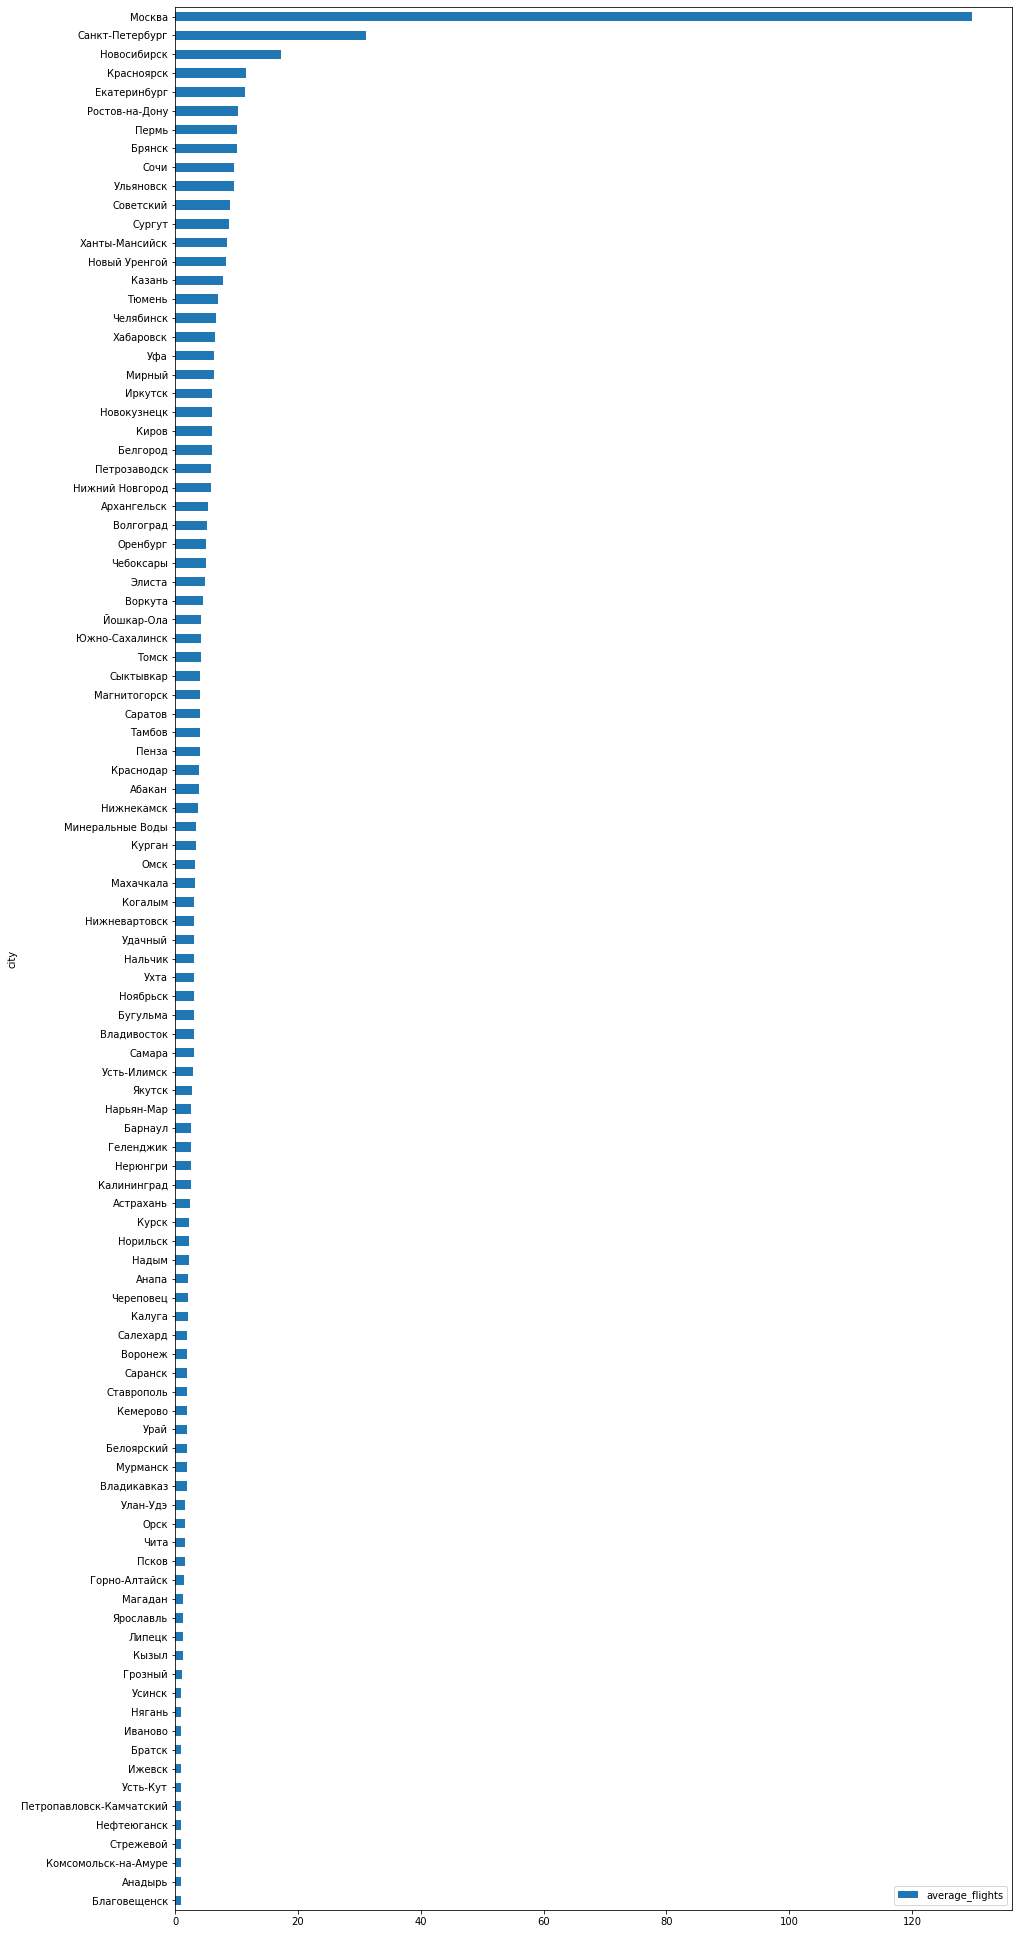

In [9]:
city_flights.sort_values(by = 'average_flights').plot(kind = 'barh', figsize = (15, 35), x = 'city')
plt.show()

Для отображения распределения числа рейсов по городам выбрала столбчатую горизонтальную диаграмму, предвариетльно отсортировав данные по среднему количеству прибывших рейсов в город. Как и ожидается, сильно выделяется среднее число рейсов, прибывающих в Москву - почти четверть от всех данных, Санкт-Петербург на втором месте с 6%, остальное делят между собой регионы, доля рейсов мала по сравнению со столицей. 

## Визуализация топ-10 городов по среднему количеству рейсов в день

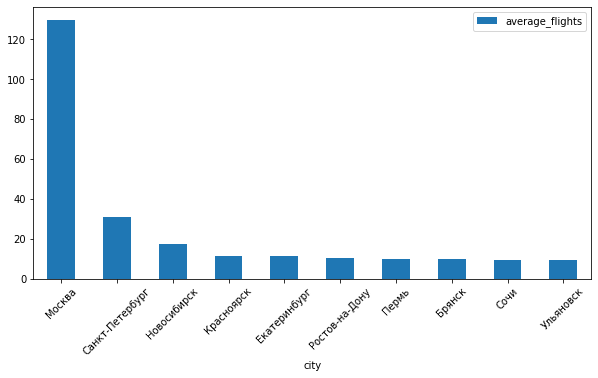

In [10]:
city_flights.sort_values(by = 'average_flights', ascending = False).head(10).plot(kind = 'bar', figsize = (10, 5), x = 'city')
plt.xticks(rotation=45)
plt.show()

При визуализации топ 10 городов по среднему количеству рейсов в день удобно построить столбчатую диаграмму, на ней хорошо видно, что Москва сильно выделяется среди остальных городов, далее идут наиболее крупные города России с примерно одинаковым показателем. 

Москва является столицей, она наиболее связана с остальными городами и направлениями, поэтому наибольшая доля рейсов приходится на нее.

Далее располагаются города-миллионники: Санкт-Петербург (он выделяется на фоне городов с меньшим населением своими показателями рейсов, но на фоне Москвы его можно сравнивать с остальными миллионниками). К миллионникам в этом списке относятся СПб, Новосибирск, Красноярск, Екатеринбург, Ростов-на-Дону, Пермь. В этих городах помимо большого числа населения есть большие аэропорты, которые связаны как с остальными городами страны, так и есть возможность полететь из них за границу. В эти города летают многие авиакомпании России. 
    
Сочи - курортный город, который принимает множество туристов и спортсменов и, хоть он и не миллионник, его появление в списке топ10 городов по среднему числу рейсов не удивляет.
    
Брянск и Ульяновск - относительно небольшие города, но они тоже попали в список. В обоих городах есть международные аэропорты, в (и из которых) которые совершают рейсы многие авиакомпании, видимо, этим и обусловлено их появление в нашем датасете

## Вывод

В рамках данного проекта мне предстояло изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали. 

В рамках построения SQL-запросов я получила таблицу, определяющую недели в году, когда летают рейсы в Москву, а также недели, в которые проходят фестивали в Москве. К сожалению, на данном этапе нельзя говорить о репрезентативности полученных результатов, невозможно сказать определенно, были ли связаны рейсы с днями проведения крупнейших фестивалей. Данные о числе проданных билетов по неделям примерно постоянны, а в неделю проведения фестиваля Park Live билетов вообще намного меньше, чем обычно. Но это не значит, что эти значения коррелируют между собой, необходимо проводить более глубокий анализ и искать зависимости. 

Кроме этого, был проведен анализ наиболее оппулярных моделей самолетов для полетов внутри страны, ими оказались относительно небольшие самолеты Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100, из чего я сделала вывод, что пассажиропоток внутренних авиаперевозок наименьшим образом нуждается во вместиетльных боингах и аэробусов, они все же предпочтительней на больших дистанциях, а также не стоит заблывать о их обслуживании и использовании топлива. 

Также было проанализировано среднее число рейсов в день в городах России, здесь ожидаемо лидирует Москва, как центр всех передвижений, на нее приходится четверть от всех рейсов, а остальные три четверти делят между собой регионы, где в топ10 городов с наибольшим средним числом рейсов в основном входят города-миллионники и города чуть поменьше, но с международными аэропортами, которые могут их связывать с другими городами России и другими странами


## Чек-лист готовности проекта

- [x]  импортировать файлы
- [x]  изучить данные в них
- [x]  проверить типы данных на корректность
- [x]  выбрать топ-10 городов по количеству рейсов
- [x]  построить график: модели самолетов и количество рейсов,
- [x]  построить график: города и количество рейсов, 
- [x]  построить график: топ-10 городов и количество рейсов;
- [x]  сделать выводы по каждому из графиков, пояснить результат.

